# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow 
!pip install matplotlib
!pip uninstall opencv-contrib-python -
!pip uninstall opencv-python -y
!pip install opencv-python 
!pip install mediapipe
!pip install scikit-learn
!pip install matplotlib

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.0.3-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/276.5 MB ? eta -:--:--
   ---------------

ERROR: Invalid requirement: '-': Expected package name at the start of dependency specifier
    -
    ^


  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached jax-0.4.13-py3-none-any.whl
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.4.7-py3-none-win_amd64.whl.metadata (1.4 kB)
     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------------- 59.0/59.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/50.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/50.8 MB 2.6 MB/s eta 0:00:20
   ---------------------------------------- 0.1/50.8 MB 2.2 MB/s eta 0:00:24
   ---------------------------------------- 0.3/50.8 MB 2.1 MB/s eta 0:00:24
   ---------------------------------------- 0.4/50.8 MB 2.2 MB/s eta 0:00:23
   ---------------------------------------- 0.6/50.8 MB 2.6 MB/s eta 0:00:20
    ---------------------------------

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    return image, results

In [5]:
import mediapipe as mp

# Initialize drawing utils
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

def draw_landmarks(image, results):
    # Customize the drawing specs for the face landmarks
    face_drawing_spec1 = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
    face_drawing_spec2 = mp_drawing.DrawingSpec(color=(80, 256, 10), thickness=1, circle_radius=1)

    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_holistic.FACEMESH_CONTOURS, # Updated constant for face connections
            landmark_drawing_spec=face_drawing_spec1,
            connection_drawing_spec=face_drawing_spec2 # Use the same spec for connections
        )
    
    # The following will use default drawing specifications for other landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS # Constant for pose connections
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS # Constant for hand connections
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS # Constant for hand connections
        )

In [6]:
cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret:
            print("Ignoring empty camera frame.")
            continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)  # Corrected function name

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

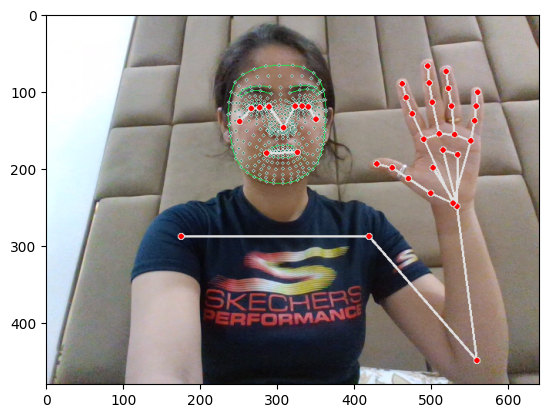

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)
# len(results.right_hand_landmarks.landmark)

21

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
pose

array([ 4.81949270e-01,  3.07858378e-01, -7.02973783e-01,  9.99996483e-01,
        5.05505383e-01,  2.49424323e-01, -6.22205019e-01,  9.99991775e-01,
        5.19166052e-01,  2.49905735e-01, -6.22250080e-01,  9.99992728e-01,
        5.31342804e-01,  2.50567347e-01, -6.21620834e-01,  9.99991715e-01,
        4.52722311e-01,  2.51855791e-01, -6.55751348e-01,  9.99992013e-01,
        4.33662653e-01,  2.53290027e-01, -6.55362487e-01,  9.99992490e-01,
        4.16694105e-01,  2.55311191e-01, -6.55787706e-01,  9.99990523e-01,
        5.47187924e-01,  2.83833146e-01, -1.75670415e-01,  9.99990702e-01,
        3.92581254e-01,  2.91007340e-01, -3.54006857e-01,  9.99995947e-01,
        5.10289848e-01,  3.74802947e-01, -5.52115142e-01,  9.99991596e-01,
        4.48113382e-01,  3.76109511e-01, -5.98000586e-01,  9.99994576e-01,
        6.54802442e-01,  6.00844026e-01,  1.15635656e-01,  9.99894857e-01,
        2.74730742e-01,  6.01617098e-01, -2.79472768e-01,  9.99420941e-01,
        8.73460114e-01,  

In [13]:
# Assuming 'results' is the output from MediaPipe's face detection
if results.face_landmarks:
    # Flatten the list of landmarks into a single array
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    # Provide a default array of zeros if no face landmarks are detected
    # The length of the array is 1404 because MediaPipe's Face Mesh produces
    # 468 landmarks, each with x, y, and z coordinates (468 landmarks * 3 coordinates)
    face = np.zeros(468 * 3)

In [14]:
face

array([ 0.4807241 ,  0.35518923, -0.03124616, ...,  0.54069239,
        0.2392524 ,  0.02425442])

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.48194927,  0.30785838, -0.70297378, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.48194927,  0.30785838, -0.70297378, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [20]:
# # Path for exported data, numpy arrays
# DATA_PATH = os.path.join('MP_Data')

# # Actions that we try to detect
# actions = np.array(['understand','remember'])

# # Thirty videos worth of data
# no_sequences = 60

# # Videos are going to be 30 frames in length
# sequence_length = 30

# # Folder start
# start_folder = 0

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', #'indian', 'bye-bye', 'I', 'you', 'man', 'women', 'he', 'she', 'deaf', 'proffesor', 'hearing','thank you very much','welcome','please','sorry','namaste','how are you','i am fine','my name is',
                    #'practice', 'yes','no','good','bad','correct','wrong','weak','easy','difficult','strong',
                    #'food','day','peace','no fear','understand','remember' 
])
                    

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [22]:
# # Check if the base directory exists, if not, create it
# if not os.path.exists(DATA_PATH):
#     os.makedirs(DATA_PATH)

# for action in actions:
#     action_path = os.path.join(DATA_PATH, action)

#     # Check if the base action directory exists, if not, create it
#     if not os.path.exists(action_path):
#         os.makedirs(action_path)

#     for sequence in range(no_sequences):
#         sequence_path = os.path.join(action_path, str(sequence))
#         if not os.path.exists(sequence_path):
#             os.makedirs(sequence_path)

In [23]:
# Assume DATA_PATH and actions are defined previously in your code
# no_sequences is also defined previously in your code

# Make sure the base DATA_PATH exists
os.makedirs(DATA_PATH, exist_ok=True)

for action in actions:
    # Construct the full path for the current action
    action_path = os.path.join(DATA_PATH, action)

    # Check if the action directory exists before proceeding
    if not os.path.exists(action_path):
        os.makedirs(action_path)
        dirmax = 0  # Since the directory was just created, it's empty
    else:
        # List subdirectories of the action directory
        subdirs = [d for d in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, d))]

        # Find the maximum directory name, assuming they're named with integers
        dirmax = np.max(np.array(subdirs).astype(int)) if subdirs else 0  # Handle empty directory

    # Now create new directories as needed
    for sequence in range(0, no_sequences):
        sequence_path = os.path.join(action_path, str(dirmax + sequence))
        os.makedirs(sequence_path, exist_ok=True)

In [24]:
pwd


'c:\\Users\\hp\\Downloads\\Action Detection Refined (1)'

# 5. Collect Keypoint Values for Training and Testing

In [25]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(start_folder, start_folder+no_sequences):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(500)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [26]:
# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        
        # Loop control variables
        start_collecting = False
        stop_collecting = False

        while not start_collecting:
            ret, frame = cap.read()
            cv2.putText(frame, f'Press "s" to start collecting frames for {action}', (15, 12), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
            cv2.putText(frame, f'Press "q" to quit', (15, 36), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', frame)
            k = cv2.waitKey(1)
            if k & 0xFF == ord('s'):
                start_collecting = True
            elif k & 0xFF == ord('q'):
                stop_collecting = True
                break

        if stop_collecting:
            break

        for sequence in range(start_folder, start_folder + no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                if not ret:
                    print("Failed to grab frame.")
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, f'STARTING {action} sequence {sequence}', (120, 200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else:
                    cv2.putText(image, f'Collecting frames for {action} sequence {sequence}', (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    stop_collecting = True
                    break

            if stop_collecting:
                break

        if stop_collecting:
            break

cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
# # Path for exported data, numpy arrays
# DATA_PATH = os.path.join('MP_Data')

# # Actions that we try to detect
# actions = np.array(['hello', 'thanks', 'iloveyou', 'indian', 'bye-bye', 'I', 'you', 'man', 'women', 'he', 'she', 'deaf', 'proffesor', 'hearing','thank you very much','welcome','please','sorry','namaste','how are you','i am fine','my name is',
#                     'practice', 'yes','no','good','bad','correct','wrong','weak','easy','difficult','strong',
#                     'food','day','peace','no fear','understand','remember'])

# # Thirty videos worth of data
# no_sequences = 60

# # Videos are going to be 30 frames in length
# sequence_length = 30

# # Folder start
# start_folder = 0

In [29]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array([f for f in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, f))])
sequence_length = 30
no_sequences = 60
# Create a mapping from folder names to a unique number
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'bad': 0,
 'bye-bye': 1,
 'correct': 2,
 'day': 3,
 'deaf': 4,
 'difficult': 5,
 'easy': 6,
 'food': 7,
 'good': 8,
 'he': 9,
 'hearing': 10,
 'hello': 11,
 'how are you': 12,
 'I': 13,
 'i am fine': 14,
 'iloveyou': 15,
 'indian': 16,
 'man': 17,
 'my name is': 18,
 'namaste': 19,
 'no': 20,
 'no fear': 21,
 'peace': 22,
 'please': 23,
 'practice': 24,
 'proffesor': 25,
 'remember': 26,
 'she': 27,
 'sorry': 28,
 'strong': 29,
 'thank you very much': 30,
 'thanks': 31,
 'understand': 32,
 'weak': 33,
 'welcome': 34,
 'women': 35,
 'wrong': 36,
 'yes': 37,
 'you': 38}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data\\bad\\0\\0.npy'

In [33]:
np.array(sequences).shape

(0,)

In [34]:
np.array(labels).shape

(0,)

In [35]:
X = np.array(sequences)

In [36]:
X.shape

(0,)

In [37]:
from keras.utils import to_categorical

y = to_categorical(labels).astype(int)

ValueError: zero-size array to reduction operation maximum which has no identity

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

NameError: name 'y' is not defined

In [39]:
y_test.shape

NameError: name 'y_test' is not defined

# 7. Build and Train LSTM Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:

model = Sequential()
# Adding LSTM layers
model.add(LSTM(64, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='tanh', recurrent_activation='sigmoid'))
model.add(LSTM(64, return_sequences=False, activation='tanh', recurrent_activation='sigmoid'))
# Adding Dense layers
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(actions.shape[0], activation='softmax'))  # Ensure 'actions.shape[0]' correctly represents the number of output classes


In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# # Define the checkpoint path and filename
# checkpoint_path = "model_checkpoints/checkpoint_{epoch:02d}"
# if not os.path.exists("model_checkpoints"):
#     os.makedirs("model_checkpoints")

# # Create a ModelCheckpoint callback that saves the model's weights
# checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     save_weights_only=True,
#     monitor='val_loss',  # or 'val_accuracy' or another metric that you want to monitor
#     mode='min',  # or 'max' if monitoring 'accuracy'
#     save_best_only=True,
#     verbose=1
# )

In [45]:
history = model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback, checkpoint_callback])

NameError: name 'X_train' is not defined

In [46]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 39)                1287      
                                                                 
Total params: 597863 (2.28 MB)
Trainable params: 597863 

# 8. Make Predictions

In [47]:
res = model.predict(X_test)

NameError: name 'X_test' is not defined

In [48]:
actions[np.argmax(res[4])]

TypeError: 'NormalizedLandmark' object is not subscriptable

In [49]:
actions[np.argmax(y_test[4])]

NameError: name 'y_test' is not defined

# 9. Save Weights

In [50]:
# model.save('action3.h5')

In [51]:
# del model

In [ ]:
model.load_weights('action3.h5')

NameError: name 'model' is not defined

# 10. Evaluation using Confusion Matrix and Accuracy

In [52]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

NameError: name 'y_test' is not defined

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

NameError: name 'ytrue' is not defined

In [ ]:
accuracy_score(ytrue, yhat)

NameError: name 'ytrue' is not defined

# 11. Test in Real Time

In [53]:
from scipy import stats
import matplotlib.pyplot as plt


In [54]:
res.shape

AttributeError: shape

In [55]:
def generate_colors(num_colors):
    return [(i % 256, (i * 5) % 256, (i * 13) % 256) for i in range(num_colors)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob[0] * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

# Generate 40 unique colors
colors = generate_colors(40)

In [ ]:
# output_frame = cv2.cvtColor(prob_viz(res, actions, image, colors), cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))
plt.show()

IndexError: invalid index to scalar variable.

In [58]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_true = ytrue  # Actual labels
y_pred = yhat  # Predicted labels by the model

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
# Choose 'micro', 'macro', or 'weighted' based on your classification needs
average_method = 'macro'  # Adjust this as necessary

precision = precision_score(y_true, y_pred, average=average_method, zero_division=0)
recall = recall_score(y_true, y_pred, average=average_method)
f1 = f1_score(y_true, y_pred, average=average_method)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision ({average_method} average): {precision:.4f}")
print(f"Recall ({average_method} average): {recall:.4f}")
print(f"F1 Score ({average_method} average): {f1:.4f}")



NameError: name 'ytrue' is not defined

: 